In [ ]:
# 1) Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Pour un affichage plus net des figures dans Colab
%config InlineBackend.figure_format = 'retina'


In [ ]:
# 2) Charger le dataset
df = pd.read_csv("/content/homework.csv - homework.csv.csv")

In [ ]:
print("Aperçu du dataset :")
print(df.head())
print("\nColonnes disponibles :", df.columns.tolist())

Aperçu du dataset :
   rownames  price  lotsize  bedrooms  bathrms  stories driveway recroom  \
0         1  42000     5850         3        1        2      yes      no   
1         2  38500     4000         2        1        1      yes      no   
2         3  49500     3060         3        1        1      yes      no   
3         4  60500     6650         3        1        2      yes     yes   
4         5  61000     6360         2        1        1      yes      no   

  fullbase gashw airco  garagepl prefarea  
0      yes    no    no         1       no  
1       no    no    no         0       no  
2       no    no    no         0       no  
3       no    no    no         0       no  
4       no    no    no         0       no  

Colonnes disponibles : ['rownames', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']


In [ ]:
# 3) SIMPLE LINEAR REGRESSION (X = lotsize, y = price)
df_simple = df[["lotsize", "price"]].dropna()

X_simple = df_simple[["lotsize"]]   # X doit être 2D (DataFrame)
y_simple = df_simple["price"]       # y peut être une Series

In [ ]:
# Split train/test
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)


=== Simple Linear Regression (lotsize -> price) ===
Intercept (b0) : 33003.36216890106
Coefficient (b1) pour lotsize : 6.885408879999409
R² = 0.186, MAE = 17465.644, RMSE = 23322.119


/tmp/ipython-input-773757934.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x_grid = np.linspace(X_simple.min()[0], X_simple.max()[0], 100).reshape(-1, 1)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


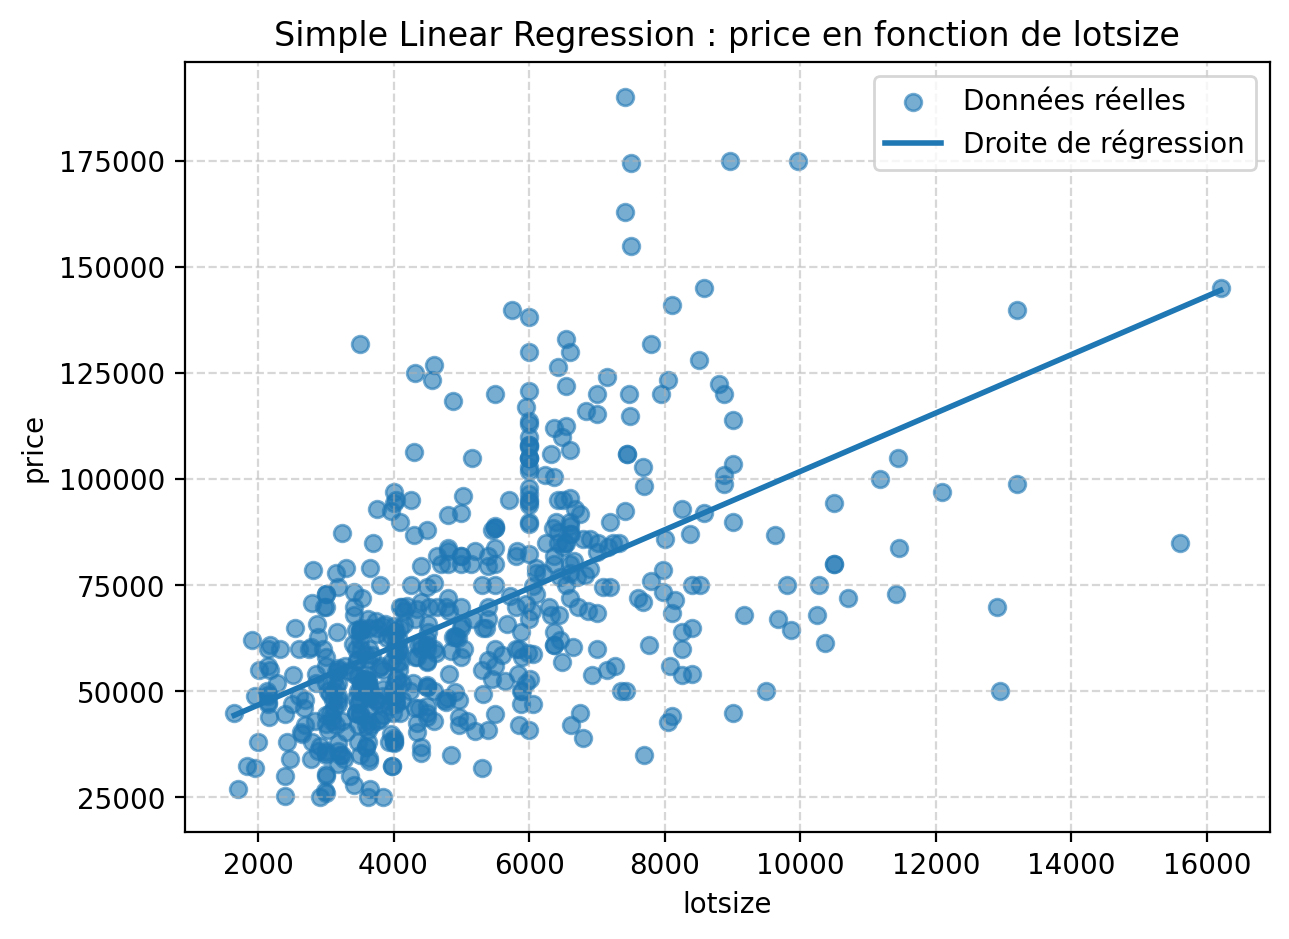

In [ ]:
# Créer et entraîner le modèle
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Prédictions
y_pred_s = model_simple.predict(X_test_s)

# Évaluer le modèle
r2_s = r2_score(y_test_s, y_pred_s)
mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s)) # Fix: removed squared=False and added np.sqrt

print("\n=== Simple Linear Regression (lotsize -> price) ===")
print("Intercept (b0) :", model_simple.intercept_)
print("Coefficient (b1) pour lotsize :", model_simple.coef_[0])
print(f"R² = {r2_s:.3f}, MAE = {mae_s:.3f}, RMSE = {rmse_s:.3f}")

# 3.a) Affichage scatter + droite de régression
plt.figure(figsize=(7,5))
plt.scatter(X_simple, y_simple, alpha=0.6, label="Données réelles")
# Pour tracer la droite, on génère une grille de lotsize
x_grid = np.linspace(X_simple.min()[0], X_simple.max()[0], 100).reshape(-1, 1)
y_grid = model_simple.predict(x_grid)
plt.plot(x_grid, y_grid, label="Droite de régression", linewidth=2)

plt.title("Simple Linear Regression : price en fonction de lotsize")
plt.xlabel("lotsize")
plt.ylabel("price")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()